# Brief Introduction on ECG and ECG Signals.

Electrocardiography (ECG or EKG) is basically the recording the electrical activity of the heart over a certain period of time. The information can be obtained using the electrodes which are placed over the skin of the body. The electrodes which are placed above the skin detect very small electrical signals that arise from the heart muscles. The cell membranes forming the outer covering of the heart cell have some electrical charge which is depolarized during every heart beat. These signals which are very small are detected and later amplified with the help of ECG monitoring device. The signal obtained or graph of voltage versus time produced by the this procedure is referred to as an electrocardiogram.


 
ECG was invented by William Einthoven in the early 1900’s, the system was too complex, bulky and required a large no. of workforce. Present day ECG devices are compact and portable. 



 The length of the file is: 43081

 The length of the time array is: 43081
[2072 2072 2070 ..., 2075 2075 2075]


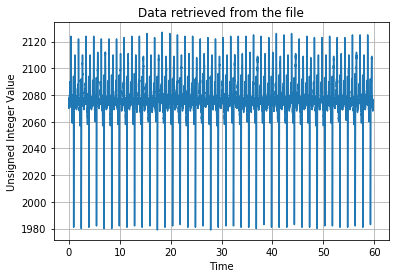

In [101]:
# Now we begin with the program for the given ECG Signal
# Importing the magic command and other files from the python library
%matplotlib inline
from __future__ import division
from scipy import signal
import pandas as pd
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec

f = open('aami3a.dat','rb')  #opens the ECG signal 

AllSignal = np.fromfile(f,count=-1,dtype=np.uint16) #Reads all the inputs from the file

print('\n The length of the file is: ' + str(len(AllSignal)))

x = np.arange(0,(len(AllSignal))/720.,1/720.) #Arrange according to step size

print('\n The length of the time array is: ' + str(len(x)))

Samples = AllSignal[:43081]

print Samples

pl.plot(x,AllSignal)
pl.title('Data retrieved from the file')
pl.xlabel('Time')
pl.ylabel('Unsigned Integer Value')    
pl.grid()

We have plotted the provided ECG signal which contain 43081 samples. The ECG signal is sampled at a frequency of 720Hz.


We have to obtain 5 beats in a signal. Therefore to calculate 5 beats in a signal, we will have to calculate the no. of samples required to zoom into the first 5 beats in the signal.

$$ Required Samples = \frac{No. of Seconds}{Sampling time} $$


where, $$ Sampling Time = \frac{1}{Frequency of the signal} $$

Therefore, we need 5040 samples in order to zoom into the first 5 beats in the signal.




 No. of the Samples required to Zoom into first 5 Beats = 5040.0


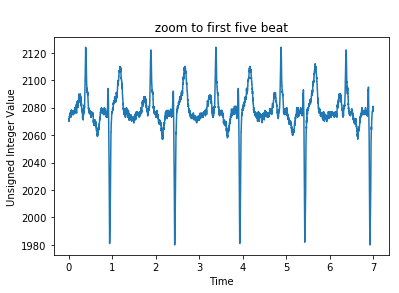

In [112]:
Sampling_time = 1/720.
Req_Samples = 7/Sampling_time
print '\n No. of the Samples required to Zoom into first 5 Beats = ' +str(Req_Samples)

zoom = np.arange(0,Req_Samples/720.,1/720.) #arranging to required samples of zooming to first 5 beats w.r.t. step size
pl.plot(zoom,AllSignal[:int(Req_Samples)])
pl.title('\n zoom to first five beat ')
pl.xlabel('Time')
pl.ylabel('Unsigned Integer Value')



 No. of the Samples required to Zoom into first 5 Beats = 5040.0


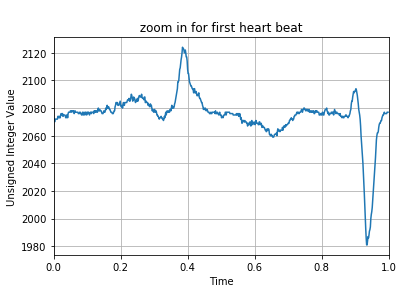

In [103]:
Sampling_time = 1/720.
Req_Samples1 = 1/Sampling_time
print '\n No. of the Samples required to Zoom into first 5 Beats = ' +str(Req_Samples)


zoom1=np.arange(0,Req_Samples1/720.,1/720.) # arranging to required samples of zooming to 1st beat
pl.plot(zoom1,AllSignal[:int(Req_Samples1)])
pl.title('\n zoom in for first heart beat ' )
pl.xlabel('Time')
pl.ylabel('Unsigned Integer Value')
pl.xlim([0,1])
pl.grid()

In [104]:
Arrange_AllSamples=np.arange(43081) #arranging all samples in 60 secs
B=0

all_peaks=np.amax(AllSignal[:720])
print 'QRS peak is ' +str (all_peaks)
for index in t:
    if AllSignal[index]>=all_peaks:
        B=B+1

print 'Heart beats per minute is ' +str(B) 

QRS peak is 2124
Heart beats per minute is 51


Peak in DFT data is 4.98176674504
Max is observed at f =1.33712184523


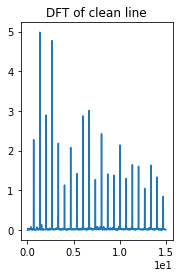

In [105]:
#we first eliminate dc
L2 = np.arange(21540)
#print L2

dataF=Samples-np.mean(Samples)
L=len(dataF)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,720/2.,720/43081.)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L

#Zooming into just less than 15Hz
inx=np.where(f>15) 
inx=inx[0]
pl.subplot(121)
pl.plot(f[:inx[0]], PyyClean[:inx[0]])
pl.title('DFT of clean line')
pl.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
p=np.amax(PyyClean[:43081])
print 'Peak in DFT data is ' +str(p)

for index in L2:
   # print PyyClean[index]
    if PyyClean[index] >=4.98:
        print 'Max is observed at f =' +str(index/59.83) #
        break
        


In [106]:
#12

In [107]:
#13

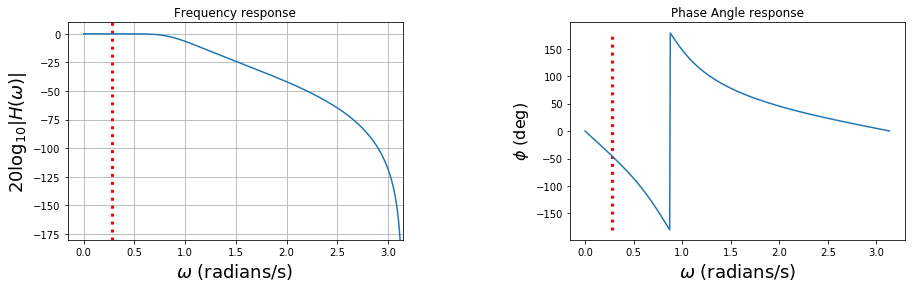

In [113]:
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=720
NF=fs/2
cutoff= 100
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)
x=np.arange(0,43081/720.,1/720.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency response')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase Angle response')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)



Peak in DFT data is 4.9816013693
Maximum is observed at f=1.33712184523


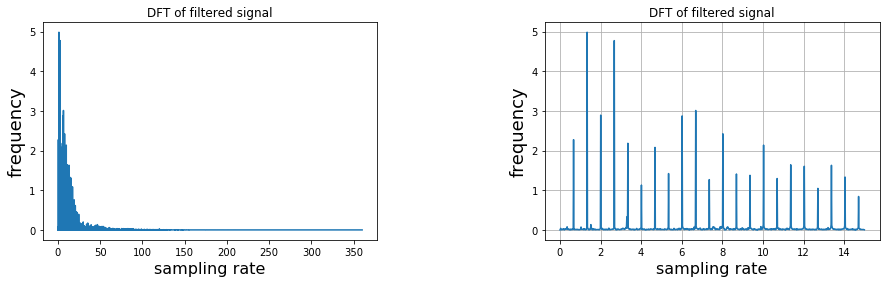

In [110]:
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

LL=len(s)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
ff=np.arange(0,720/2,720/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL

ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:21540])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel('sampling rate',fontsize=16)


indx=np.where(ff>15)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel('sampling rate',fontsize=16)

ax.grid()

p=np.amax(Pyy[:21540])
print 'Peak in DFT data is ' +str(p)
L2=np.arange(21540)
for index in L2:
    if Pyy[index]>=4.98:
        print 'Maximum is observed at f=' +str(index/59.83)  
        break 